<a href="https://colab.research.google.com/github/Coolhand78/ML/blob/main/LSTM%20stock%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Create a LTSM for predicting the next day value of AIB stock using the 
## last 60 days closing price


In [51]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import date




In [53]:
# Obtain Airbus stock prices as a DataFrame until today
today = date.today()
df = web.DataReader('AIR.PA', data_source='yahoo', start='2012-01-01', 
                    end=today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,24.500000,24.014999,24.014999,24.500000,632206.0,20.311575
2012-01-03,24.500000,24.309999,24.500000,24.500000,1417588.0,20.311575
2012-01-04,24.575001,24.295000,24.315001,24.565001,1580817.0,20.365461
2012-01-05,25.025000,24.594999,24.600000,24.889999,2412476.0,20.634899
2012-01-06,25.150000,24.510000,24.950001,24.764999,1561995.0,20.531271
...,...,...,...,...,...,...
2020-10-21,67.440002,64.000000,67.419998,64.059998,2110298.0,64.059998
2020-10-22,64.650002,62.560001,63.650002,64.449997,1983309.0,64.449997
2020-10-23,68.699997,65.220001,65.250000,68.029999,3398269.0,68.029999


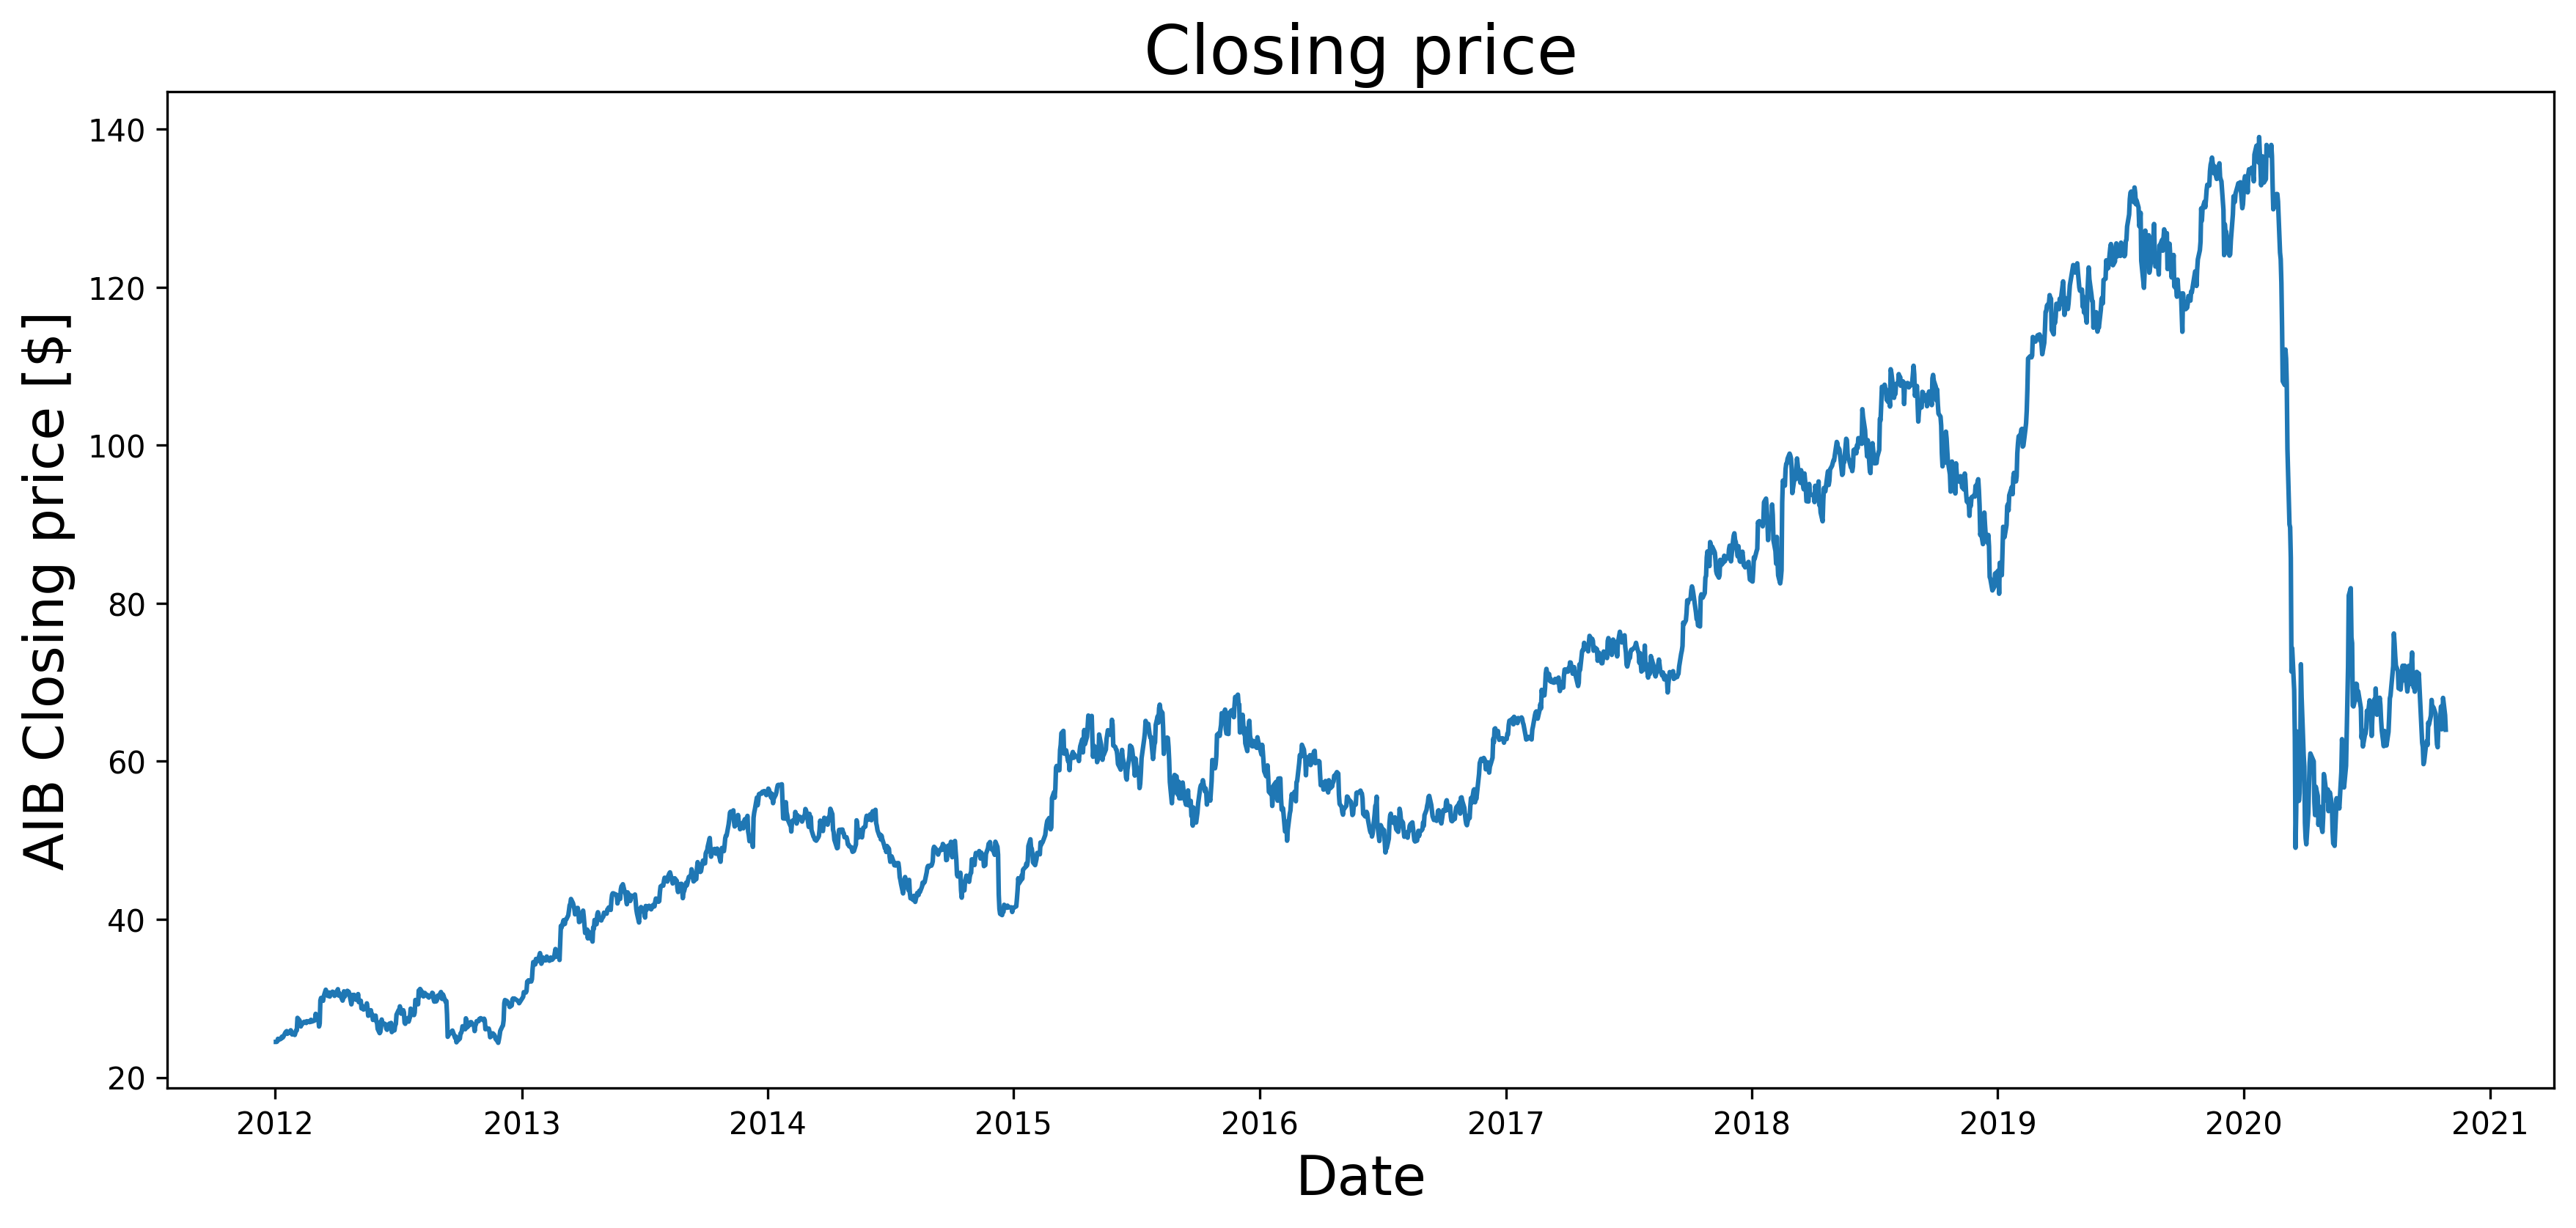

In [54]:
#Visualize closing price
plt.figure(figsize=(14,6), dpi=300)
plt.title('Closing price', fontsize=22)
plt.plot(df['Close'])

plt.xlabel('Date', fontsize=18)
plt.ylabel('AIB Closing price [$]', fontsize=18)
plt.show()


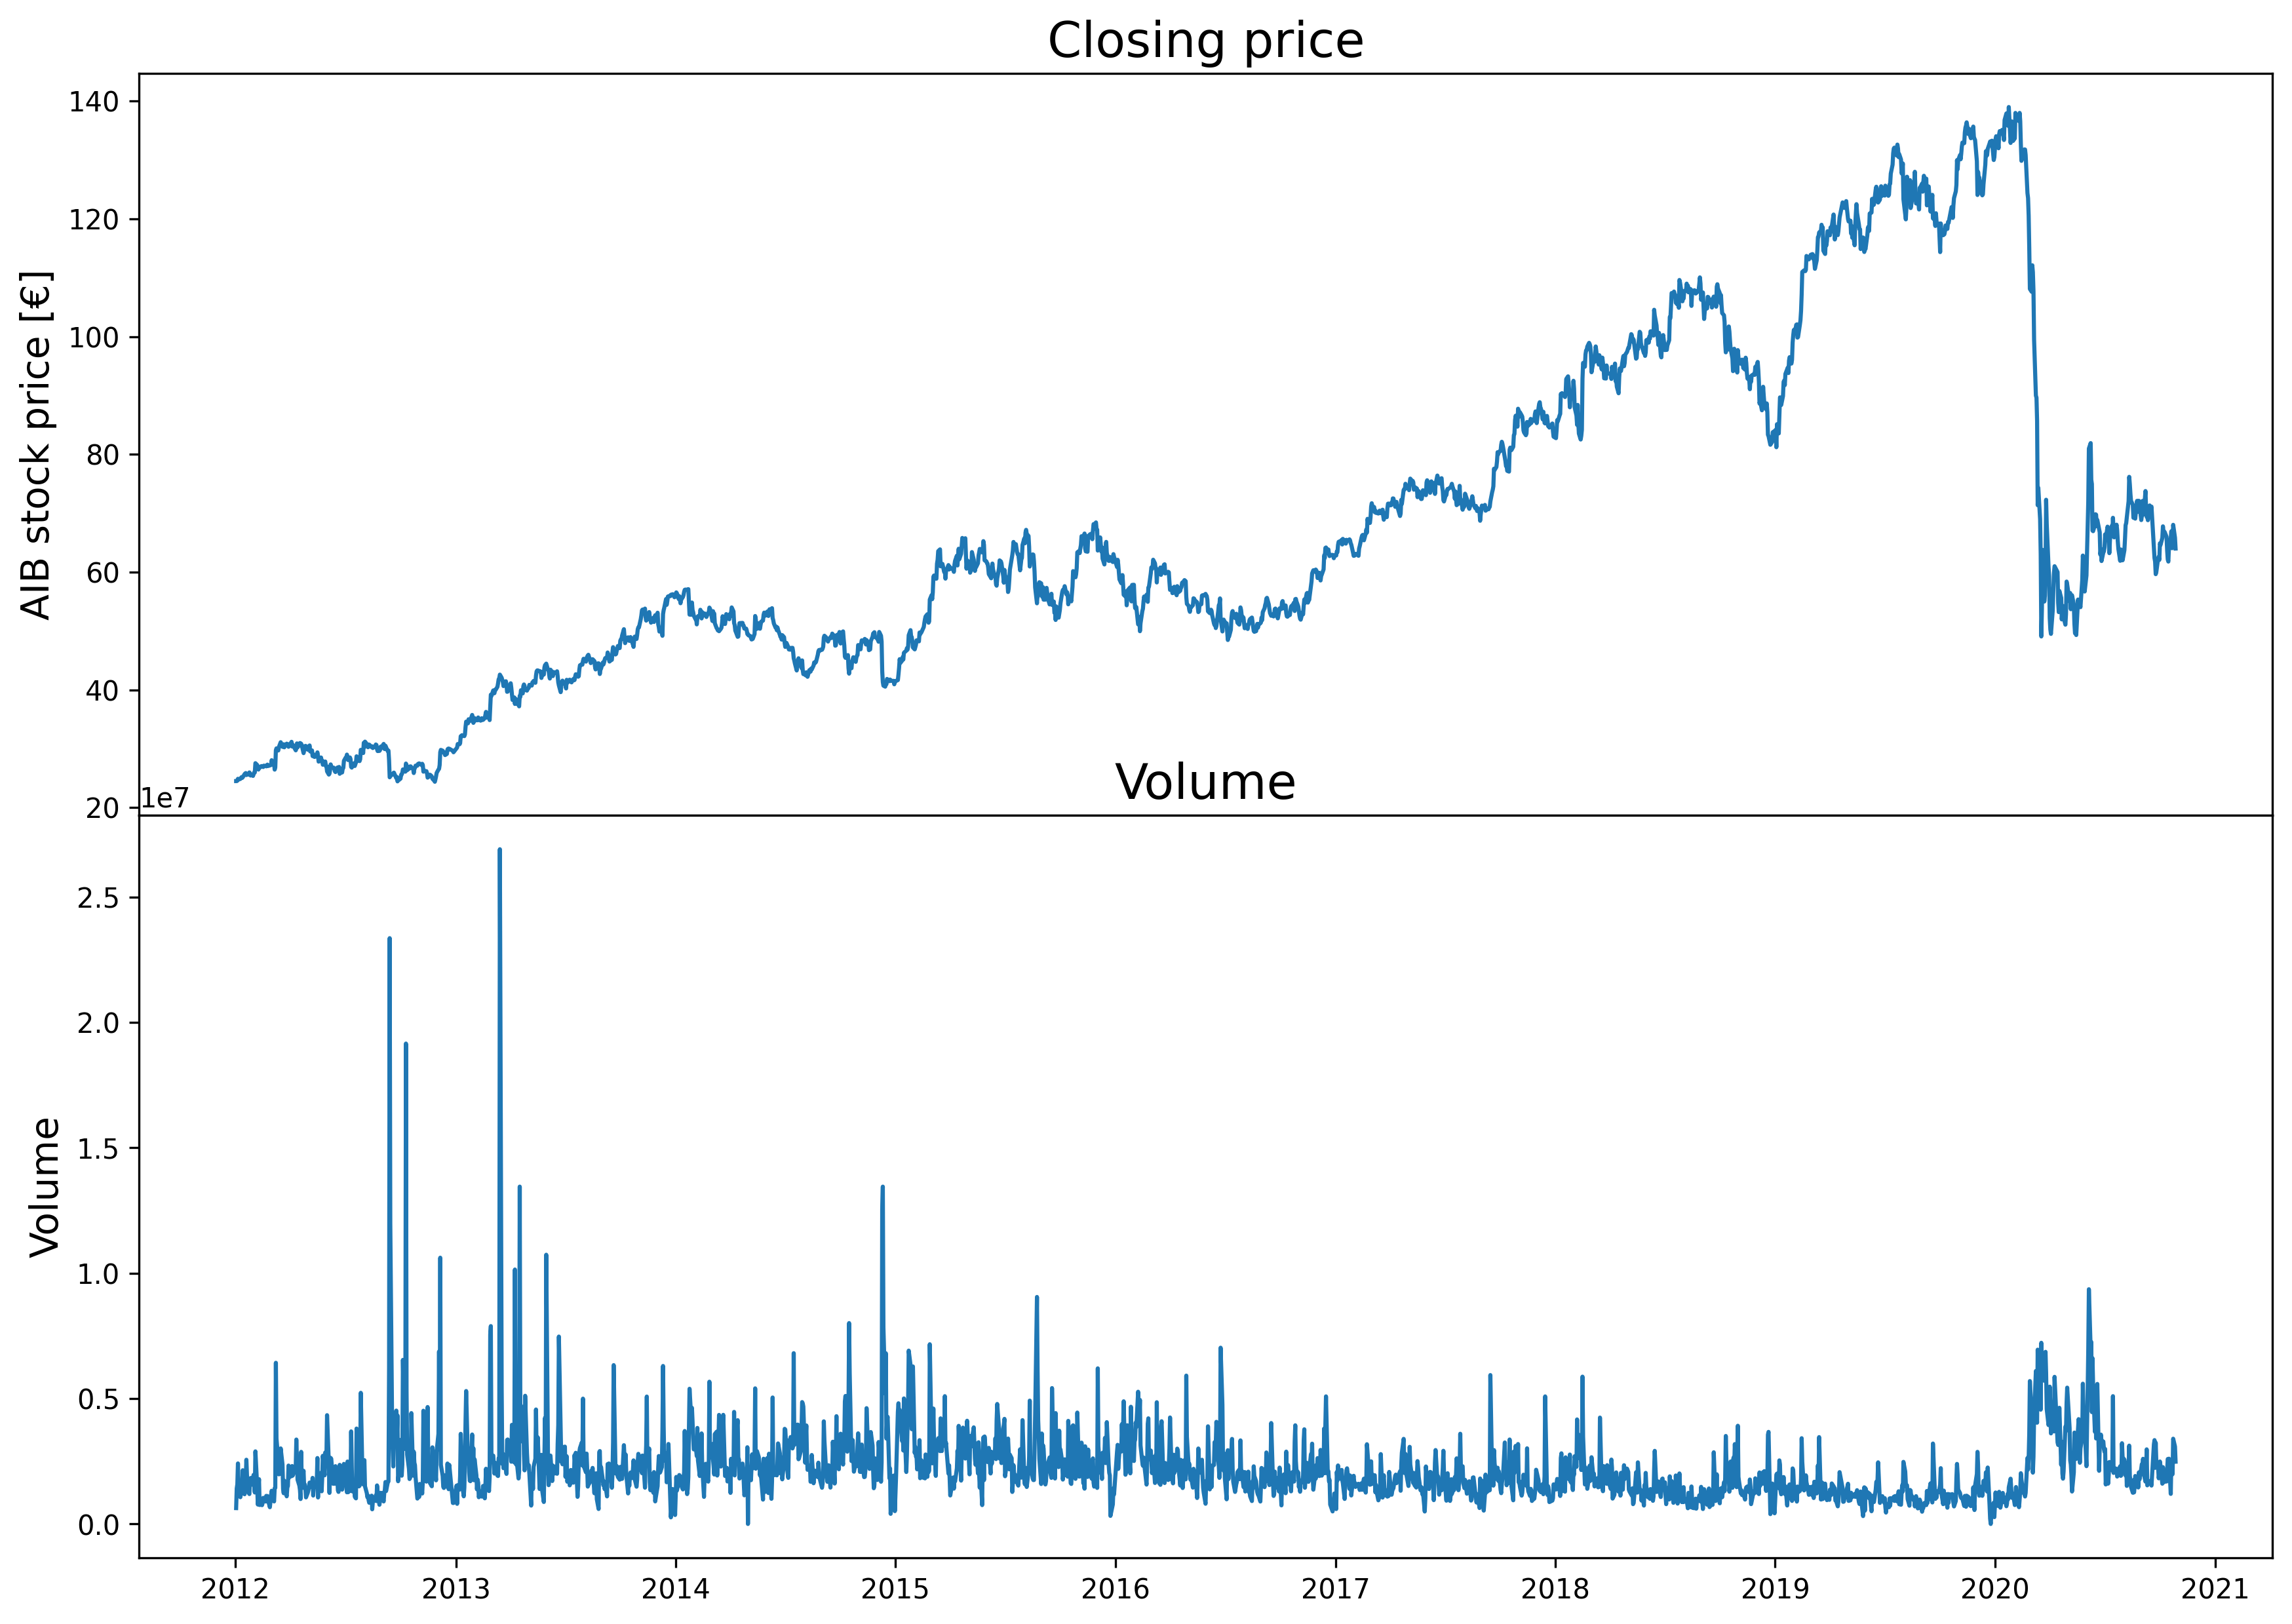

In [69]:
# Visualize closing price and volume
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), dpi=300)
ax1.plot(df['Close'])
ax1.set_title('Closing price', fontsize=18)
ax2.set_title('Volume', fontsize=18)
ax1.set_ylabel('AIB stock price [€]', fontsize = 14)
ax2.plot(df['Volume'])
ax2.set_ylabel('Volume', fontsize = 14)
plt.subplots_adjust(hspace=.0)
plt.show()

In [56]:
#Create a DataFrame with the column 'Close' only
close=df.filter(['Close'])
dataset = close.values
# Take a subset of 75% for the training
training_subset_len = math.ceil(len(close)*0.75)
# Normalize the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
normalized_close = scaler.fit_transform(dataset)

train_data = normalized_close[0:training_subset_len , :]
x_training = []
y_training = []

for i in range (60, len(train_data)):
  x_training.append(train_data[i-60:i, 0])
  y_training.append(train_data[i,0])
  

In [57]:
# Convert x_train and y_train to numpy arrays
x_training, y_training = np.array(x_training), np.array(y_training)
# Reshape to 3D
x_training = np.reshape(x_training, (x_training.shape[0], x_training.shape[1], 1))
x_training.shape

(1629, 60, 1)

In [58]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_training.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [59]:
# Compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [60]:
# Train the model
model.fit(x_training, y_training, batch_size=1, epochs=1)

1629/1629 [==============================] - 38s 24ms/step - loss: 9.2262e-04


In [61]:
# Create the data set for testing the model
test_data = normalized_close[training_subset_len - 60: , :]
x_test = []
y_test = dataset[training_subset_len: , :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [62]:
# Convert test data to nummpy array
x_test = np.array(x_test)

In [63]:
# Reshape to 3D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [64]:
# get predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [65]:
# Root mean squared error of the predictions
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(f'Root mean squared error of the predictions of the model is {rmse:.3f}')

Root mean squared error of the predictions of the model is 0.764


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


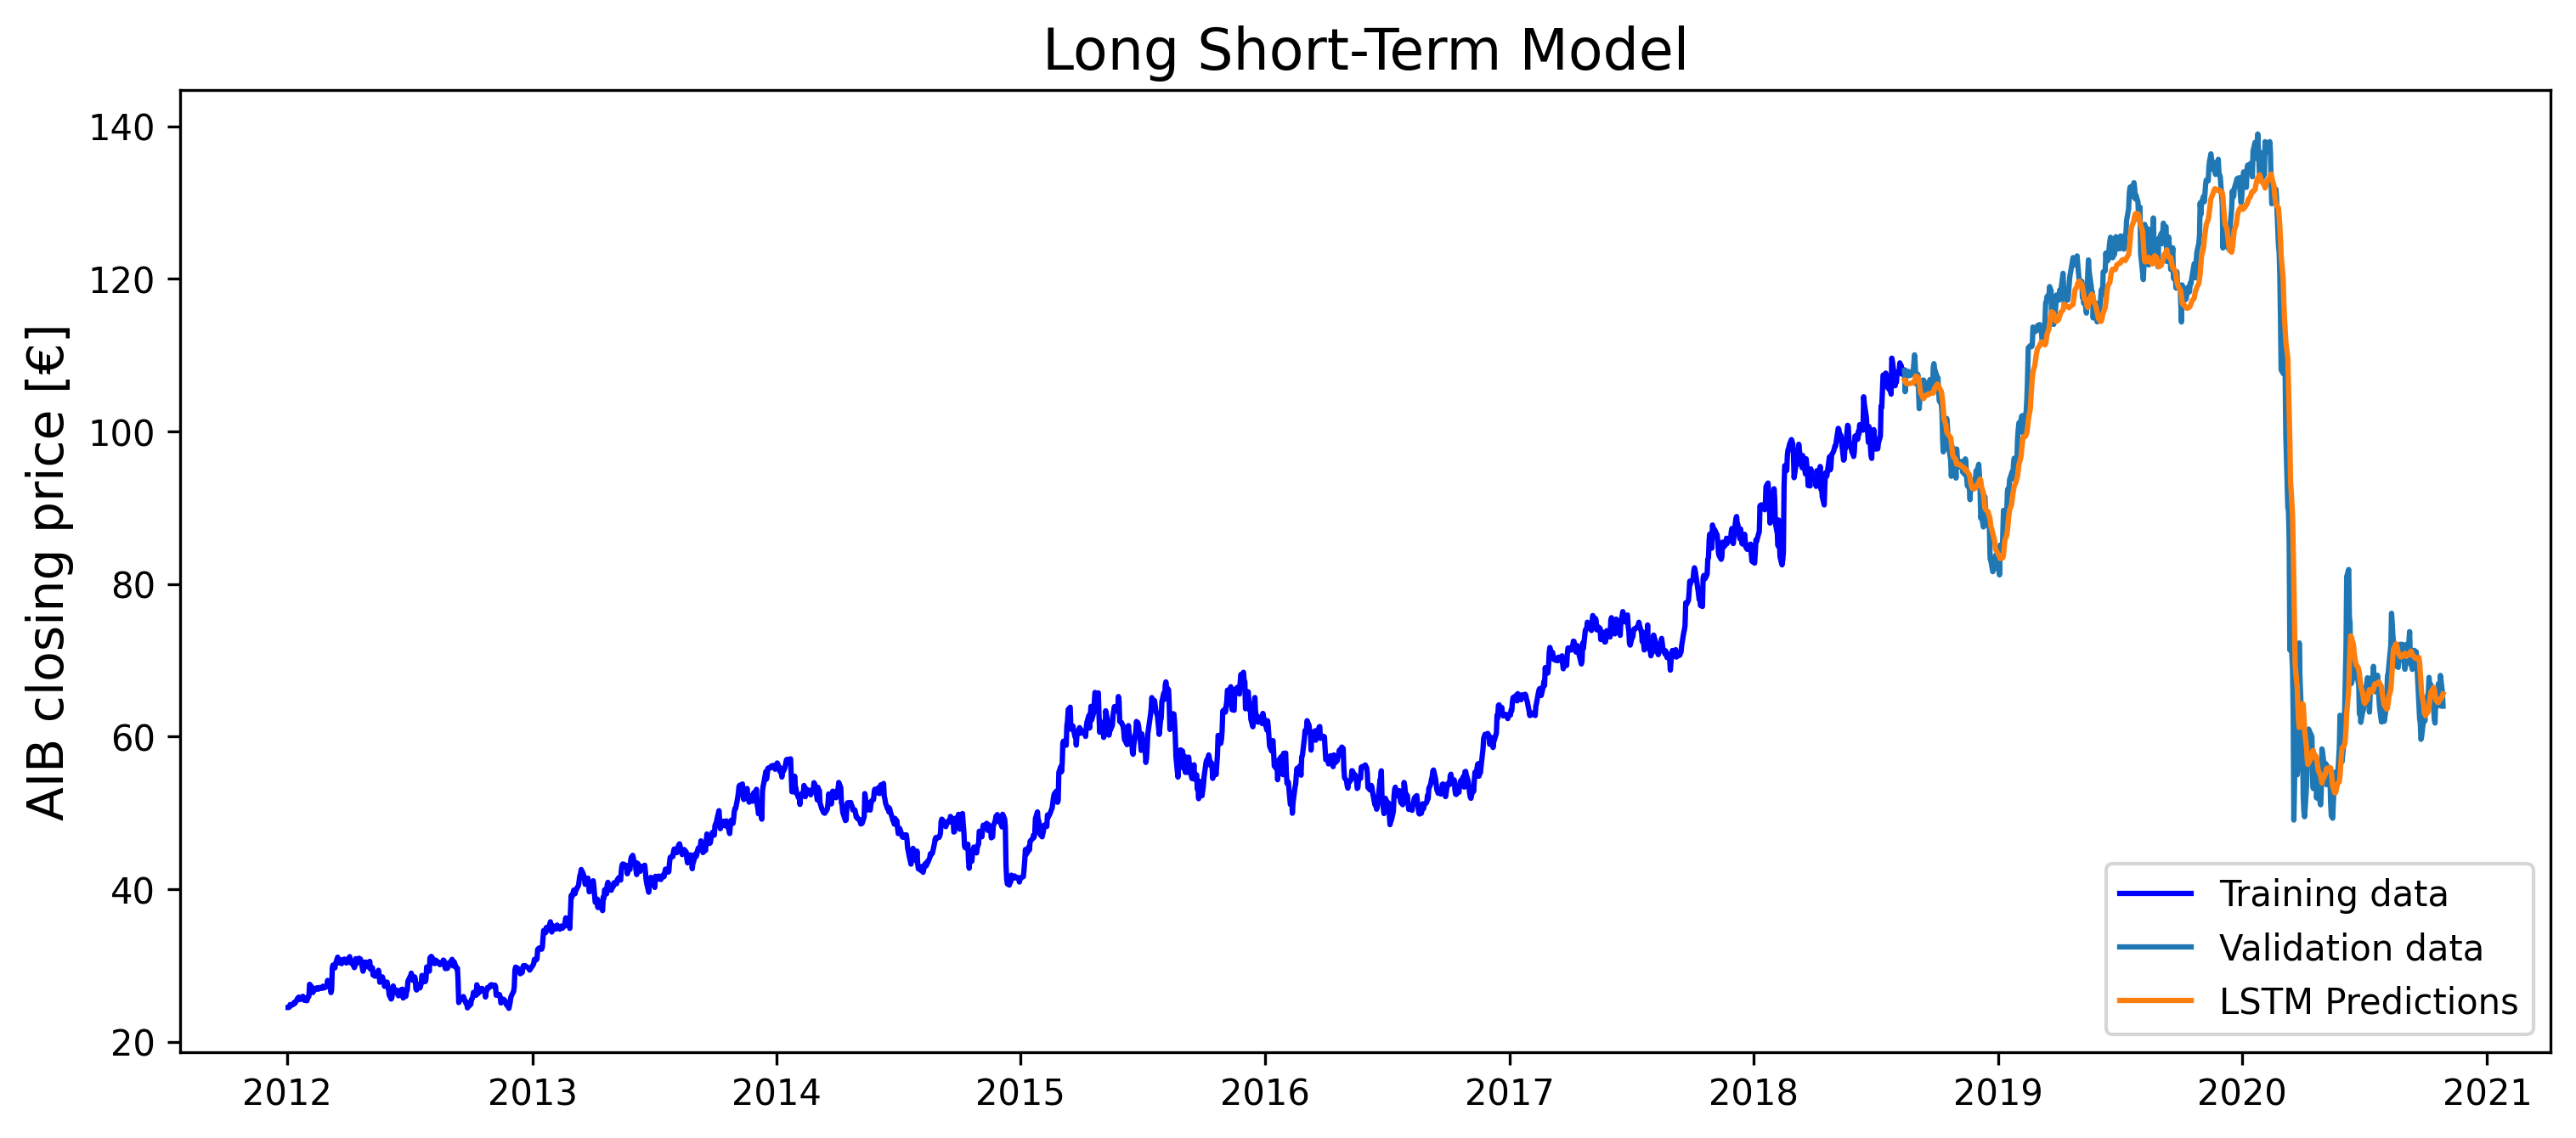

In [72]:
# plot data
train = close[:training_subset_len]
valid = close[training_subset_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(12,5), dpi=300)
plt.title('Long Short-Term Model', fontsize=16)
plt.ylabel('AIB closing price [€]', fontsize=14)
plt.plot(train['Close'], color='blue')
plt.plot(valid[['Close','Predictions']])
plt.legend(['Training data', 'Validation data', 'LSTM Predictions'], loc='lower right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


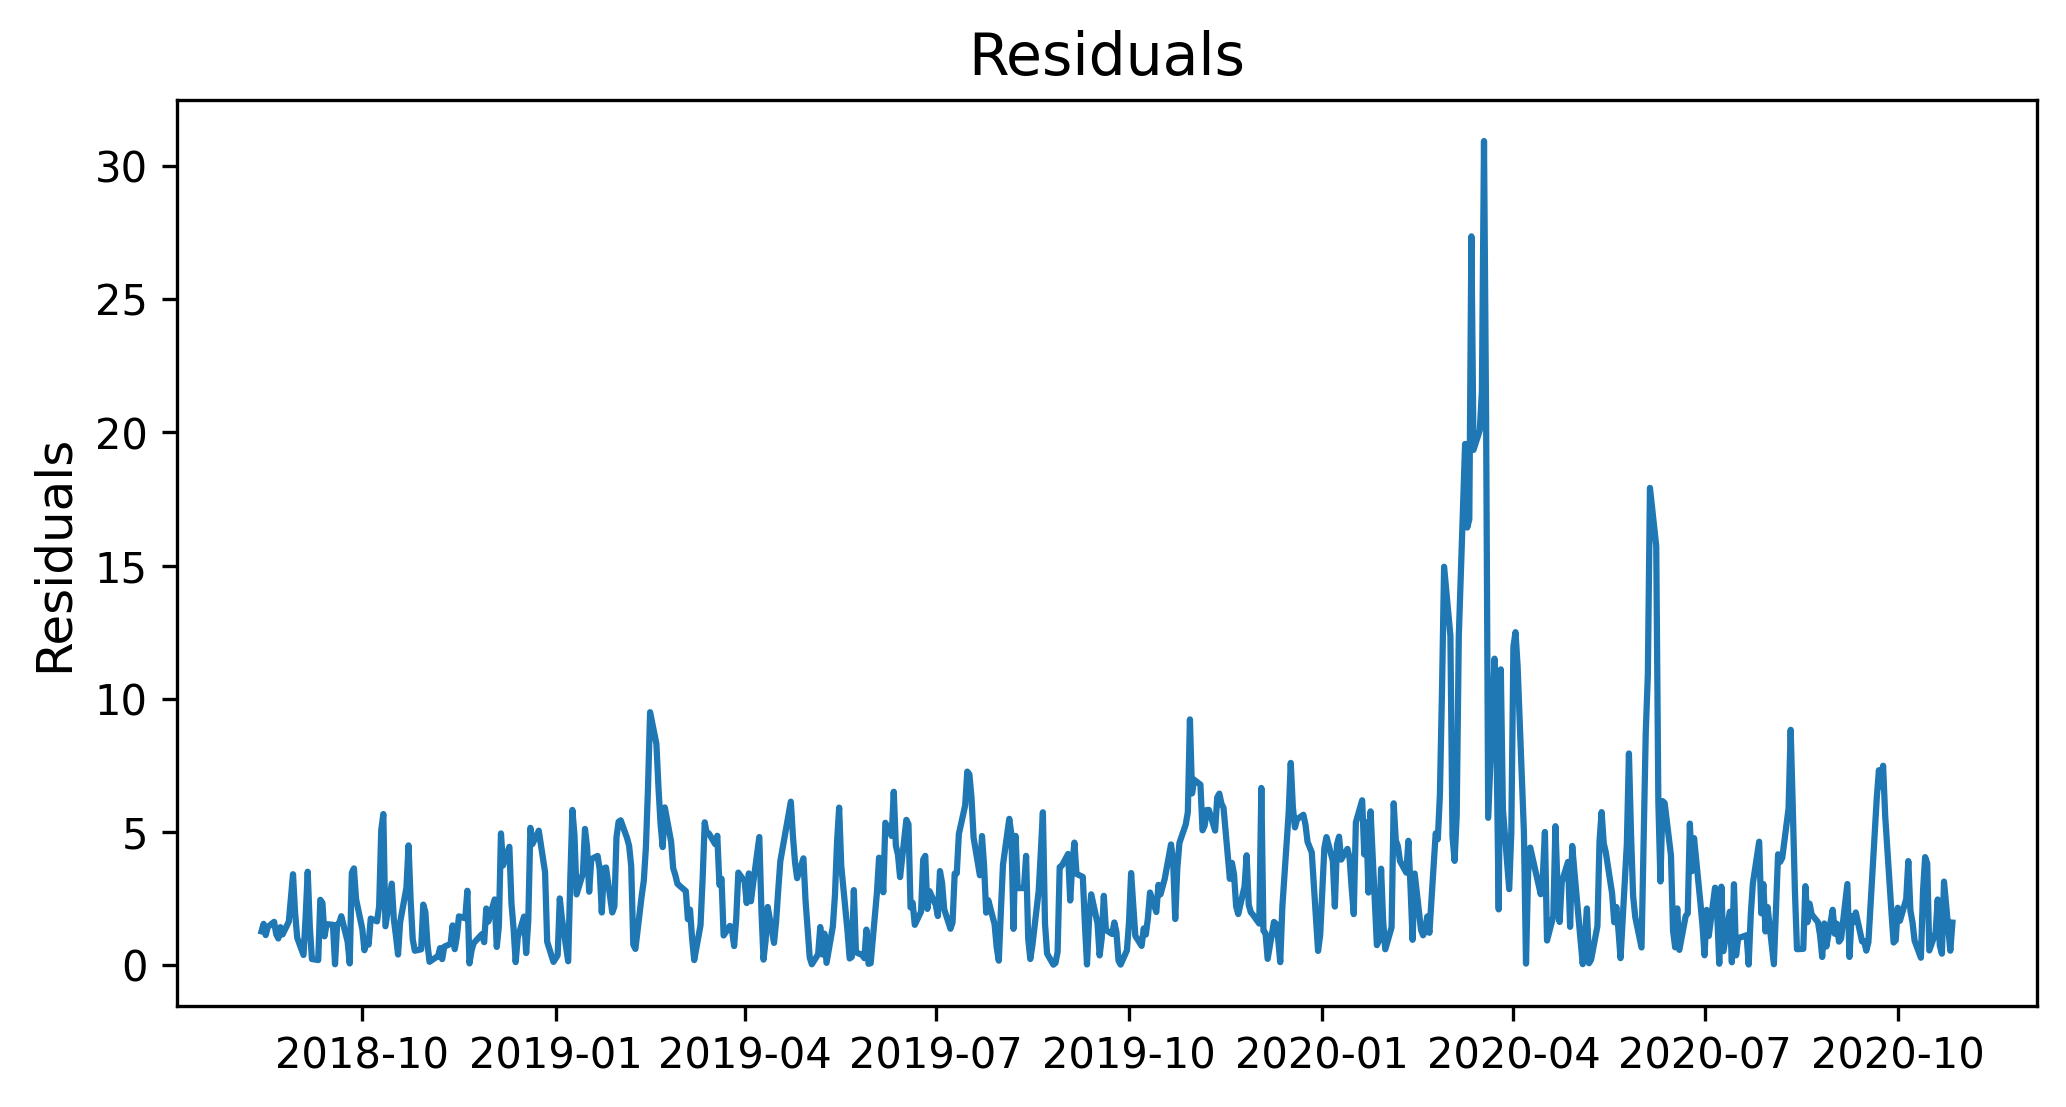

In [76]:
# Creation of a Residuals column on validation dataframe
valid['Residuals'] = list(map(lambda x: math.sqrt(x), (valid['Close']-valid['Predictions'])**2))

# Visualize residuals on validation data
plt.figure(figsize=(8,4),dpi=300)
plt.title('Residuals', fontsize=14)
plt.ylabel('Residuals', fontsize=12)
plt.plot(valid['Residuals'])
plt.show()




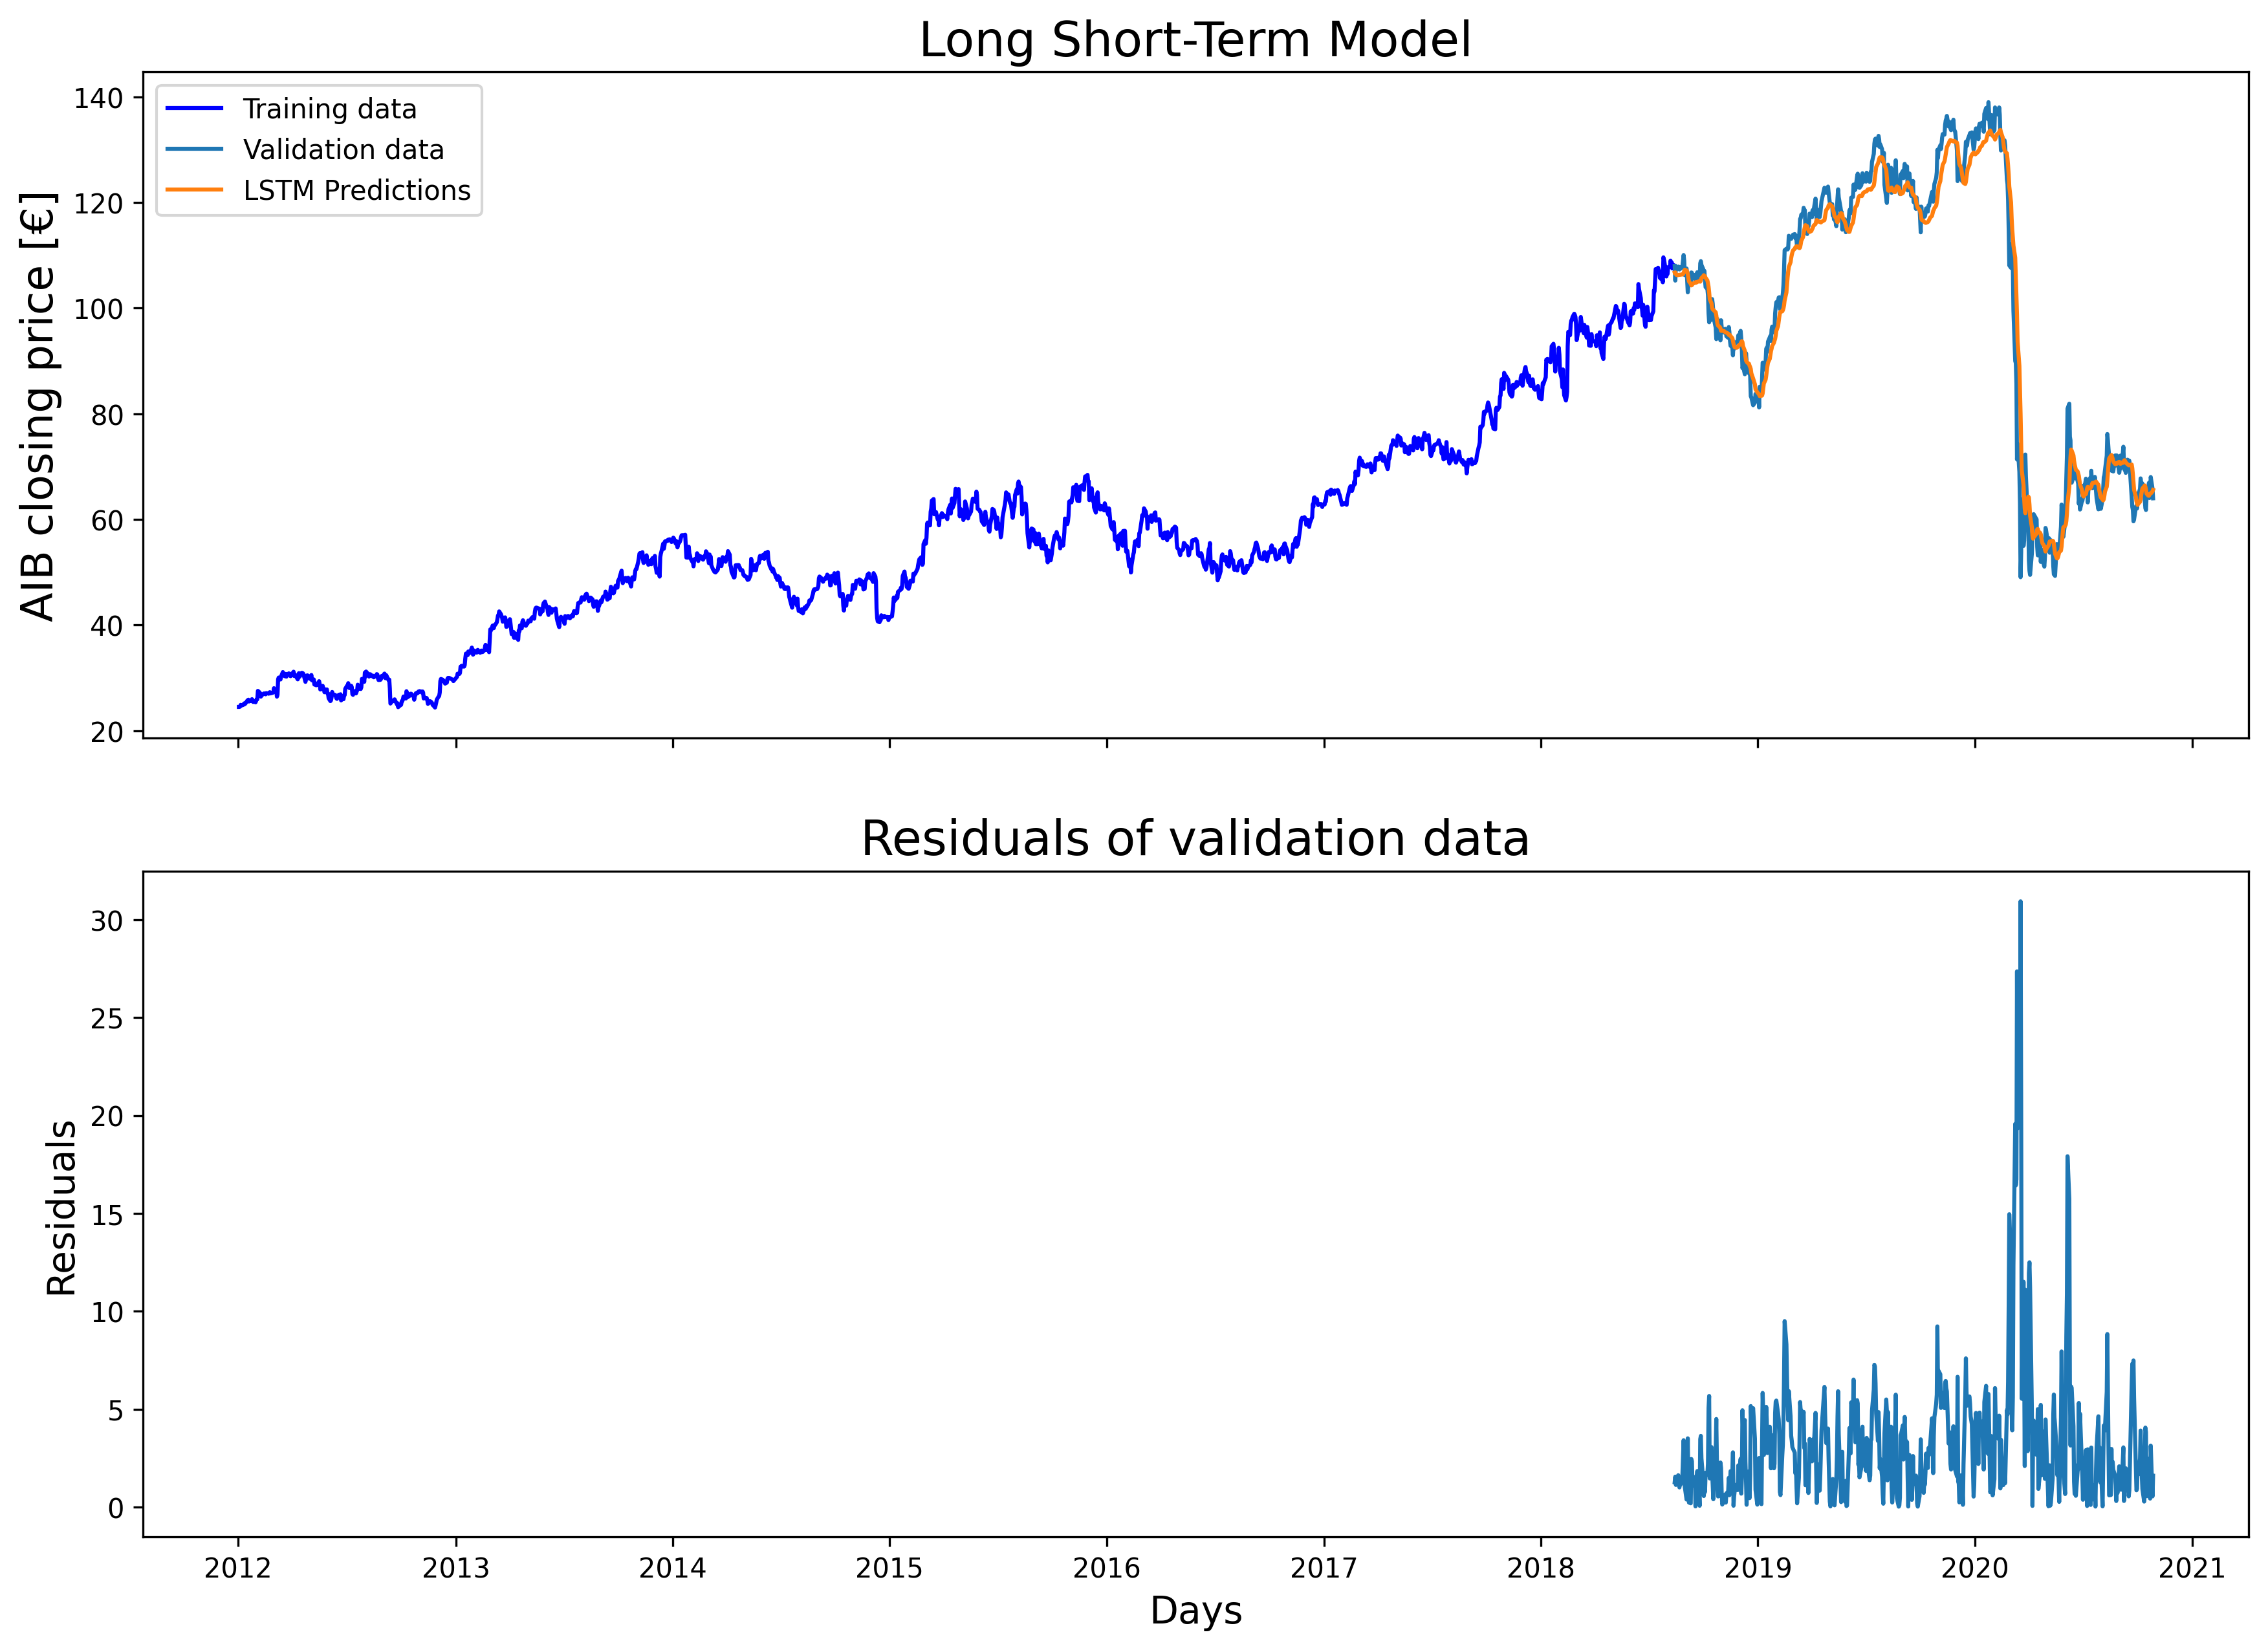

In [77]:
# Visualize LSTM prediction and residuals on Validation data on same fig
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), dpi=300, sharex=True)
ax1.set_title('Long Short-Term Model', fontsize=18)
ax1.set_ylabel('AIB closing price [€]', fontsize=16)
ax1.plot(train['Close'], color='blue')
ax1.plot(valid[['Close','Predictions']])
ax1.legend(['Training data', 'Validation data', 'LSTM Predictions'], loc='upper left')

ax2.set_title('Residuals of validation data', fontsize=18)
ax2.set_ylabel('Residuals', fontsize = 14)
ax2.plot(valid['Residuals'])
ax2.set_xlabel('Days', fontsize = 14)
plt.show()